# 1 - Imports

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import sys
from pathlib import Path

sys.path.append(str(Path().resolve().parents[0]))

In [65]:
import pandas as pd
import numpy as np

In [6]:
from src.utils import templates, config, io

/Users/hippolytegrandet/Desktop/Dev/country_risk_rating/.venv/lib/python3.9/site-packages/pypdf/_crypt_providers/_cryptography.py:32: CryptographyDeprecationWarning: ARC4 has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.ARC4 and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  from cryptography.hazmat.primitives.ciphers.algorithms import AES, ARC4


# 2 - Intigration

## 2.1 - Loading Datasets

In [123]:
oecd_rating_matrix = io.load_csv(config.INTERIM_DATA_DIR / 'oecd_rating_matrix_yearly.csv', index_col=0)
oecd_rating_matrix

,1999-01-01,2000-01-01,2001-01-01,2002-01-01,2003-01-01,2004-01-01,2005-01-01,2006-01-01,2007-01-01,2008-01-01,...,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01,2021-01-01,2022-01-01,2023-01-01
ISO3_COUNTRY_CODE,,,,,,,,,,,,,,,,,,,,,
AFG,7,7,-,-,-,-,-,-,-,7,...,7,7,7,7,7,7,7,7,7,7
ALB,7,7,7,7,7,7,6,6,6,6,...,6,6,6,6,6,6,5,5,5,5
DZA,6,6,5,5,4,4,4,3,3,3,...,3,3,3,4,4,4,4,5,5,5
AND,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
AGO,7,7,7,7,7,7,7,7,7,7,...,5,5,5,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VNM,6,6,6,6,5,5,5,5,5,4,...,5,5,5,5,5,5,4,4,4,4
PSE,-,-,-,-,-,-,-,-,-,-,...,7,7,7,7,7,7,7,7,7,7
YEM,7,7,7,6,6,6,6,6,6,6,...,7,7,7,7,7,7,7,7,7,7


In [124]:
dbnomics_df = io.load_csv(config.INTERIM_DATA_DIR / 'dbnomics_dataset_extracted.csv', index_col=0)
dbnomics_df

,WB-WDI-NY.ADJ.DPEM.GN.ZS,IMF-FM-GGR_G01_GDP_PT,IMF-FM-G_X_G01_GDP_PT,WB-WDI-NY.GDP.PCAP.CD
COUNTRY_PERIOD_INDEX,,,,
AFE-1990,3.059354,NaN,NaN,810.646700
AFE-1991,3.098059,NaN,NaN,858.727619
AFE-1992,2.107871,NaN,NaN,732.360418
AFE-1993,1.997545,NaN,NaN,715.892117
AFE-1994,1.974477,NaN,NaN,707.177202
...,...,...,...,...
ZWE-1985,NaN,NaN,NaN,648.668036
ZWE-1986,NaN,NaN,NaN,692.139958
ZWE-1987,NaN,NaN,NaN,726.620730


## 2.2 - Joining Datasets

In [125]:
oecd_countries = list(oecd_rating_matrix.index)
template_df = templates.get_template_yearly_df(oecd_countries, last_year=config.current_year)
template_df

,YEAR,ISO3_COUNTRY_CODE
COUNTRY_PERIOD_INDEX,,
AFG-1999,1999,AFG
AFG-2000,2000,AFG
AFG-2001,2001,AFG
AFG-2002,2002,AFG
AFG-2003,2003,AFG
...,...,...
ZWE-2022,2022,ZWE
ZWE-2023,2023,ZWE
ZWE-2024,2024,ZWE


### 2.2.1 - Formating OECD Ratings

In [126]:
from src.preprocessing import merge_datasets

In [127]:
formated_oecd_df = merge_datasets.format_oecd_df(oecd_rating_matrix, template_df)
formated_oecd_df

,YEAR,ISO3_COUNTRY_CODE,OECD_RATING
COUNTRY_PERIOD_INDEX,,,
AFG-1999,1999,AFG,7
AFG-2000,2000,AFG,7
AFG-2001,2001,AFG,-
AFG-2002,2002,AFG,-
AFG-2003,2003,AFG,-
...,...,...,...
ZWE-2022,2022,ZWE,7
ZWE-2023,2023,ZWE,7
ZWE-2024,2024,ZWE,-


In [134]:
io.save_csv(formated_oecd_df, config.PROCESSED_DATA_DIR / 'ratings_formatted_yearly.csv', index=True)

### 2.2.2 - Formating Features

In [129]:
dbnomics_df_subset = dbnomics_df[dbnomics_df.index.isin(template_df.index)]
formated_dbnomics_df = template_df.join(dbnomics_df_subset)
formated_dbnomics_df = formated_dbnomics_df[formated_dbnomics_df['ISO3_COUNTRY_CODE'].isin(oecd_countries)]
formated_dbnomics_df

,YEAR,ISO3_COUNTRY_CODE,WB-WDI-NY.ADJ.DPEM.GN.ZS,IMF-FM-GGR_G01_GDP_PT,IMF-FM-G_X_G01_GDP_PT,WB-WDI-NY.GDP.PCAP.CD
COUNTRY_PERIOD_INDEX,,,,,,
AFG-1999,1999,AFG,NaN,NaN,NaN,NaN
AFG-2000,2000,AFG,NaN,NaN,NaN,180.188369
AFG-2001,2001,AFG,NaN,NaN,NaN,142.903364
AFG-2002,2002,AFG,NaN,NaN,NaN,182.174038
AFG-2003,2003,AFG,NaN,9.825829,11.927498,199.643227
...,...,...,...,...,...,...
ZWE-2022,2022,ZWE,NaN,16.598777,21.476258,1676.821489
ZWE-2023,2023,ZWE,NaN,14.648601,19.968292,1592.416574
ZWE-2024,2024,ZWE,NaN,16.581003,18.640867,NaN


In [130]:
countries_info_df = io.load_csv(config.METADATA_DIR / 'countries_info.csv', index_col=0, header=[0, 1])
countries_info_df = countries_info_df.set_index(('Info', 'ISO code'))
countries_info_df

Info Legal Systems                       \
                             Country Name     Civil Law Common Law Customary   
(Info, ISO code)                                                               
AFG                           AFGHANISTAN             0          0         0   
ALB                               ALBANIA             1          0         0   
DZA                               ALGERIA             1          0         0   
AND                               ANDORRA             0          0         1   
AGO                                ANGOLA             1          0         0   
...                                   ...           ...        ...       ...   
VGB               VIRGIN ISLANDS, BRITISH             0          1         0   
WLF                     WALLIS AND FUTUNA             1          0         0   
YEM                                 YEMEN             1          1         1   
ZMB                                ZAMBIA             0          1         1   
ZWE                              ZIMBABWE             1          1         1   

                                      Languages  \
                 Muslim Mixed Official language   
(Info, ISO code)                                  
AFG                   1     0       Pashto/Dari   
ALB                   0     0          Albanian   
DZA                   1     1  Arabic/Tamazight   
AND                   0     0           Catalan   
AGO                   0     0        Portuguese   
...                 ...   ...               ...   
VGB                   0     0           English   
WLF                   0     0            French   
YEM                   1     1            Arabic   
ZMB                   0     1           English   
ZWE                   0     1           English   

                                                                 \
                                              Regional language   
(Info, ISO code)                                                  
AFG               Uzbek/Turkmen/Pashai/Nuristani/Balochi/Pamiri   
ALB                                                         NaN   
DZA                                                         NaN   
AND                                                         NaN   
AGO                                                         NaN   
...                                                         ...   
VGB                                                         NaN   
WLF                                                         NaN   
YEM                                                         NaN   
ZMB                                                         NaN   
ZWE                                                         NaN   

                                              \
                           Minority language   
(Info, ISO code)                               
AFG                                      NaN   
ALB               Greek/Macedonian/Aromanian   
DZA                                      NaN   
AND                Spanish/French/Portuguese   
AGO                                      NaN   
...                                      ...   
VGB                                  Spanish   
WLF                                  Futunan   
YEM                                      NaN   
ZMB                                      NaN   
ZWE                        Tsonga/Sotho/Ndau   

                                                                     \
                                                  National language   
(Info, ISO code)                                                      
AFG                                                          Pashto   
ALB                                                             NaN   
DZA                                                Arabic/Tamazight   
AND                                                             NaN   
AGO               Kimbundu/Umbundu/Kikongo/Chokwe/Kwanyama/Ganguela   
...                  

In [131]:
formated_features_df = merge_datasets.merge_info_and_dbnomics_datasets(formated_dbnomics_df, countries_info_df)
formated_features_df

,YEAR,ISO3_COUNTRY_CODE,WB-WDI-NY.ADJ.DPEM.GN.ZS,IMF-FM-GGR_G01_GDP_PT,IMF-FM-G_X_G01_GDP_PT,WB-WDI-NY.GDP.PCAP.CD,Info-Country_Name,Legal_Systems-Civil_Law,Legal_Systems-Common_Law,Legal_Systems-Customary,...,Languages-Widely_spoken,Geography-x_coord,Geography-y_coord,Geography-Region,Geography-Sub_Region,Geography-Intermediate_Region,Geography-Region_Code,Geography-Sub_Region_Code,Geography-Intermediate_Region_Code,Economy-Income_Group
COUNTRY_PERIOD_INDEX,,,,,,,,,,,,,,,,,,,,,
AFG-1999,1999,AFG,NaN,NaN,NaN,NaN,AFGHANISTAN,0.0,0.0,0.0,...,NaN,33.939110,67.709953,Asia,Southern Asia,Southern Asia,142.0,34.0,0.0,Low income
AFG-2000,2000,AFG,NaN,NaN,NaN,180.188369,AFGHANISTAN,0.0,0.0,0.0,...,NaN,33.939110,67.709953,Asia,Southern Asia,Southern Asia,142.0,34.0,0.0,Low income
AFG-2001,2001,AFG,NaN,NaN,NaN,142.903364,AFGHANISTAN,0.0,0.0,0.0,...,NaN,33.939110,67.709953,Asia,Southern Asia,Southern Asia,142.0,34.0,0.0,Low income
AFG-2002,2002,AFG,NaN,NaN,NaN,182.174038,AFGHANISTAN,0.0,0.0,0.0,...,NaN,33.939110,67.709953,Asia,Southern Asia,Southern Asia,142.0,34.0,0.0,Low income
AFG-2003,2003,AFG,NaN,9.825829,11.927498,199.643227,AFGHANISTAN,0.0,0.0,0.0,...,NaN,33.939110,67.709953,Asia,Southern Asia,Southern Asia,142.0,34.0,0.0,Low income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWE-2022,2022,ZWE,NaN,16.598777,21.476258,1676.821489,ZIMBABWE,1.0,1.0,1.0,...,Shona/Ndebele,-19.015438,29.154857,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0,Lower middle income
ZWE-2023,2023,ZWE,NaN,14.648601,19.968292,1592.416574,ZIMBABWE,1.0,1.0,1.0,...,Shona/Ndebele,-19.015438,29.154857,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0,Lower middle income
ZWE-2024,2024,ZWE,NaN,16.581003,18.640867,NaN,ZIMBABWE,1.0,1.0,1.0,...,Shona/Ndebele,-19.015438,29.154857,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0,Lower middle income


In [132]:
io.save_csv(formated_features_df, config.PROCESSED_DATA_DIR / 'features_dataset.csv', index=True)

### 2.2.3 - Merging Datasets

In [133]:
merged_dataset = merge_datasets.merge_info_features_ratings_datasets(formated_oecd_df, formated_features_df)
merged_dataset

,YEAR,ISO3_COUNTRY_CODE,OECD_RATING,WB-WDI-NY.ADJ.DPEM.GN.ZS,IMF-FM-GGR_G01_GDP_PT,IMF-FM-G_X_G01_GDP_PT,WB-WDI-NY.GDP.PCAP.CD,Info-Country_Name,Legal_Systems-Civil_Law,Legal_Systems-Common_Law,...,Languages-Widely_spoken,Geography-x_coord,Geography-y_coord,Geography-Region,Geography-Sub_Region,Geography-Intermediate_Region,Geography-Region_Code,Geography-Sub_Region_Code,Geography-Intermediate_Region_Code,Economy-Income_Group
COUNTRY_PERIOD_INDEX,,,,,,,,,,,,,,,,,,,,,
AFG-1999,1999,AFG,7,NaN,NaN,NaN,NaN,AFGHANISTAN,0.0,0.0,...,NaN,33.939110,67.709953,Asia,Southern Asia,Southern Asia,142.0,34.0,0.0,Low income
AFG-2000,2000,AFG,7,NaN,NaN,NaN,180.188369,AFGHANISTAN,0.0,0.0,...,NaN,33.939110,67.709953,Asia,Southern Asia,Southern Asia,142.0,34.0,0.0,Low income
AFG-2001,2001,AFG,-,NaN,NaN,NaN,142.903364,AFGHANISTAN,0.0,0.0,...,NaN,33.939110,67.709953,Asia,Southern Asia,Southern Asia,142.0,34.0,0.0,Low income
AFG-2002,2002,AFG,-,NaN,NaN,NaN,182.174038,AFGHANISTAN,0.0,0.0,...,NaN,33.939110,67.709953,Asia,Southern Asia,Southern Asia,142.0,34.0,0.0,Low income
AFG-2003,2003,AFG,-,NaN,9.825829,11.927498,199.643227,AFGHANISTAN,0.0,0.0,...,NaN,33.939110,67.709953,Asia,Southern Asia,Southern Asia,142.0,34.0,0.0,Low income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWE-2022,2022,ZWE,7,NaN,16.598777,21.476258,1676.821489,ZIMBABWE,1.0,1.0,...,Shona/Ndebele,-19.015438,29.154857,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0,Lower middle income
ZWE-2023,2023,ZWE,7,NaN,14.648601,19.968292,1592.416574,ZIMBABWE,1.0,1.0,...,Shona/Ndebele,-19.015438,29.154857,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0,Lower middle income
ZWE-2024,2024,ZWE,-,NaN,16.581003,18.640867,NaN,ZIMBABWE,1.0,1.0,...,Shona/Ndebele,-19.015438,29.154857,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0,Lower middle income


In [135]:
io.save_csv(merged_dataset, config.PROCESSED_DATA_DIR / 'final_dataset.csv', index=True)

# 3 - Quality Assessment

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

from missingno import matrix as msno_matrix
from missingno import heatmap as msno_heatmap

sns.set_theme(style="whitegrid", context="talk")

## 3.1 - Overview

In [138]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5628 entries, AFG-1999 to ZWE-2026
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   YEAR                                5628 non-null   int64  
 1   ISO3_COUNTRY_CODE                   5628 non-null   object 
 2   OECD_RATING                         5628 non-null   object 
 3   WB-WDI-NY.ADJ.DPEM.GN.ZS            3941 non-null   float64
 4   IMF-FM-GGR_G01_GDP_PT               5184 non-null   float64
 5   IMF-FM-G_X_G01_GDP_PT               5166 non-null   float64
 6   WB-WDI-NY.GDP.PCAP.CD               4872 non-null   float64
 7   Info-Country_Name                   5516 non-null   object 
 8   Legal_Systems-Civil_Law             5516 non-null   float64
 9   Legal_Systems-Common_Law            5516 non-null   float64
 10  Legal_Systems-Customary             5516 non-null   float64
 11  Legal_Systems-Muslim                5

In [139]:
merged_dataset.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
YEAR,5628.0,NaN,NaN,NaN,2012.5,8.078465,1999.0,2005.75,2012.5,2019.25,2026.0
ISO3_COUNTRY_CODE,5628,201,AFG,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OECD_RATING,5628,8,-,1424,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WB-WDI-NY.ADJ.DPEM.GN.ZS,3941.0,NaN,NaN,NaN,0.892805,1.081924,0.009065,0.159168,0.424055,1.308242,8.975804
IMF-FM-GGR_G01_GDP_PT,5184.0,NaN,NaN,NaN,29.274672,15.907688,0.636877,18.388601,26.091491,37.451439,164.054205
IMF-FM-G_X_G01_GDP_PT,5166.0,NaN,NaN,NaN,31.37219,15.114859,1.822235,20.751003,28.990543,39.218945,134.959575
WB-WDI-NY.GDP.PCAP.CD,4872.0,NaN,NaN,NaN,13803.73392,23079.109687,99.757251,1361.164829,4436.356302,16118.261887,240862.182448
Info-Country_Name,5516,197,AFGHANISTAN,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Legal_Systems-Civil_Law,5516.0,NaN,NaN,NaN,0.730964,0.443499,0.0,0.0,1.0,1.0,1.0
Legal_Systems-Common_Law,5516.0,NaN,NaN,NaN,0.340102,0.473786,0.0,0.0,0.0,1.0,1.0


## 3.2 - Missingness Analysis

### 3.2.1 Distribution of Missingness Across Features

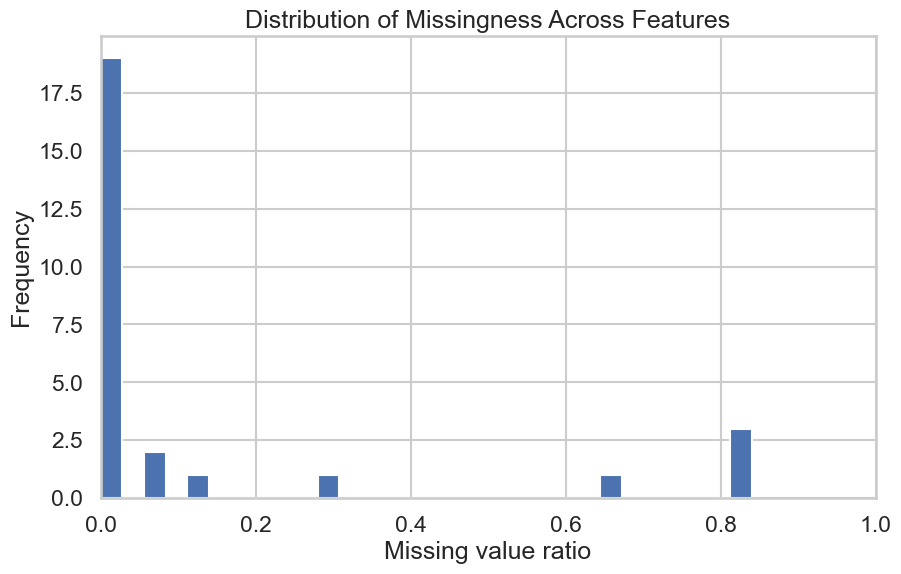

In [140]:
missing_ratio = merged_dataset.isna().mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
missing_ratio.plot(kind="hist", bins=30)
plt.xlabel("Missing value ratio")
plt.xlim([0.0, 1.0])
plt.title("Distribution of Missingness Across Features")
plt.show()

### 3.2.1 Missingness Matrix for Features over Time

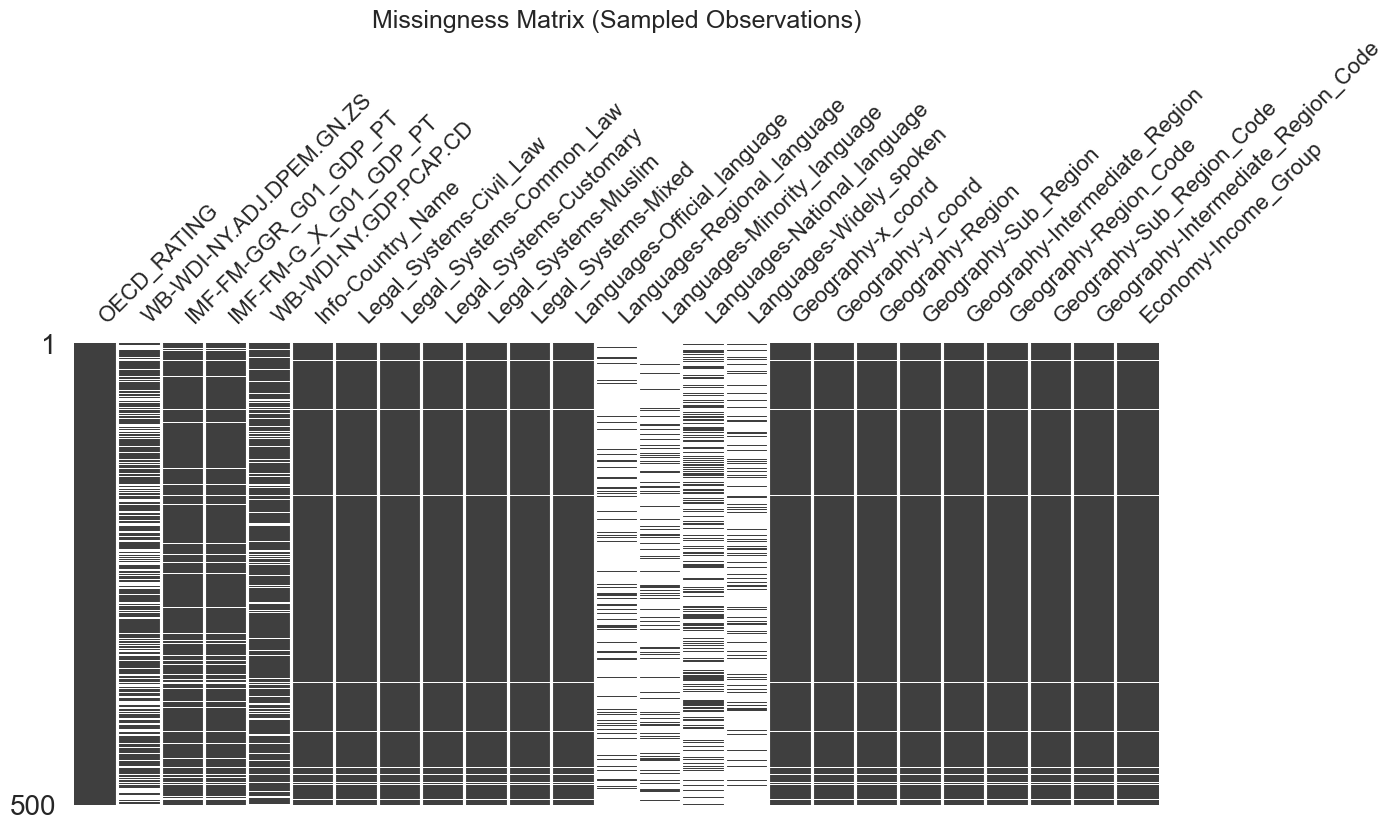

In [141]:
msno_matrix(
    merged_dataset.sort_values(by=['YEAR']).drop(columns=config.info_columns).sample(min(len(dbnomics_intigrated_df), 500)),
    figsize=(14, 6),
    sparkline=False
)
plt.title("Missingness Matrix (Sampled Observations)")
plt.show()

### 3.2.1 Correlation of Missingness Between Features

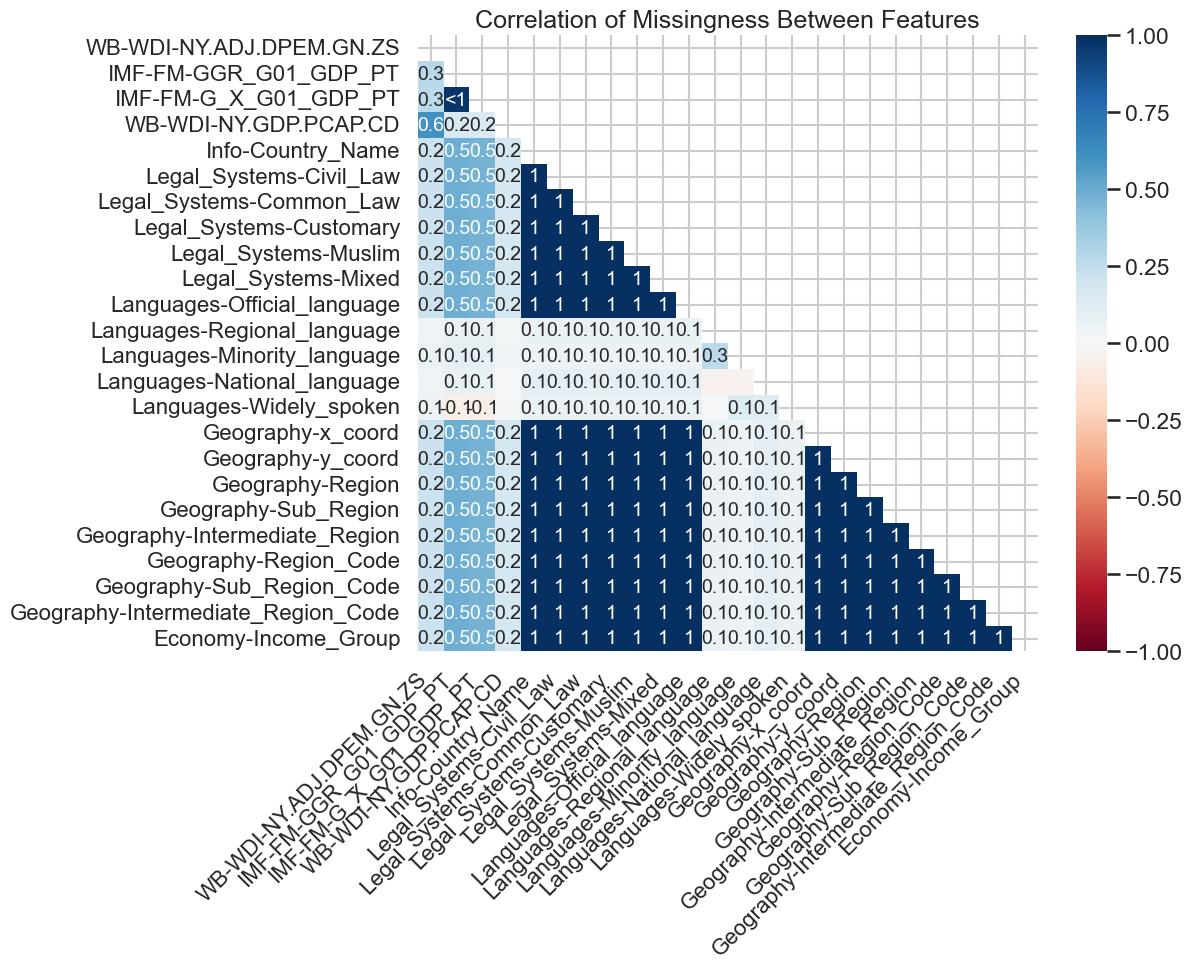

In [142]:
msno_heatmap(merged_dataset, figsize=(10, 8))
plt.title("Correlation of Missingness Between Features")
plt.show()

## 3.3 Coverage by Country Analysis

In [143]:
coverage = merged_dataset.groupby("ISO3_COUNTRY_CODE") \
.apply(lambda x: x.notna().mean().mean()) \
.sort_values()

/var/folders/z6/32ll3t5d46q7xhp0hcl2wpww0000gn/T/ipykernel_97956/818459852.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  coverage = merged_dataset.groupby("ISO3_COUNTRY_CODE") \


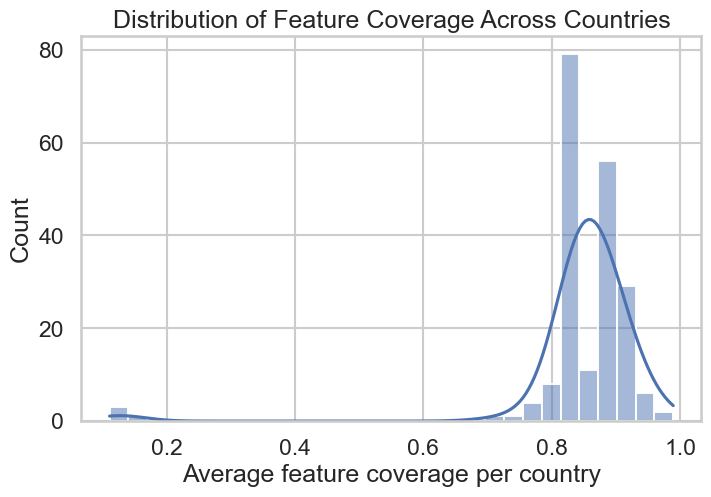

In [144]:
plt.figure(figsize=(8, 5))
sns.histplot(coverage, bins=30, kde=True)
plt.xlabel("Average feature coverage per country")
plt.title("Distribution of Feature Coverage Across Countries")
plt.show()

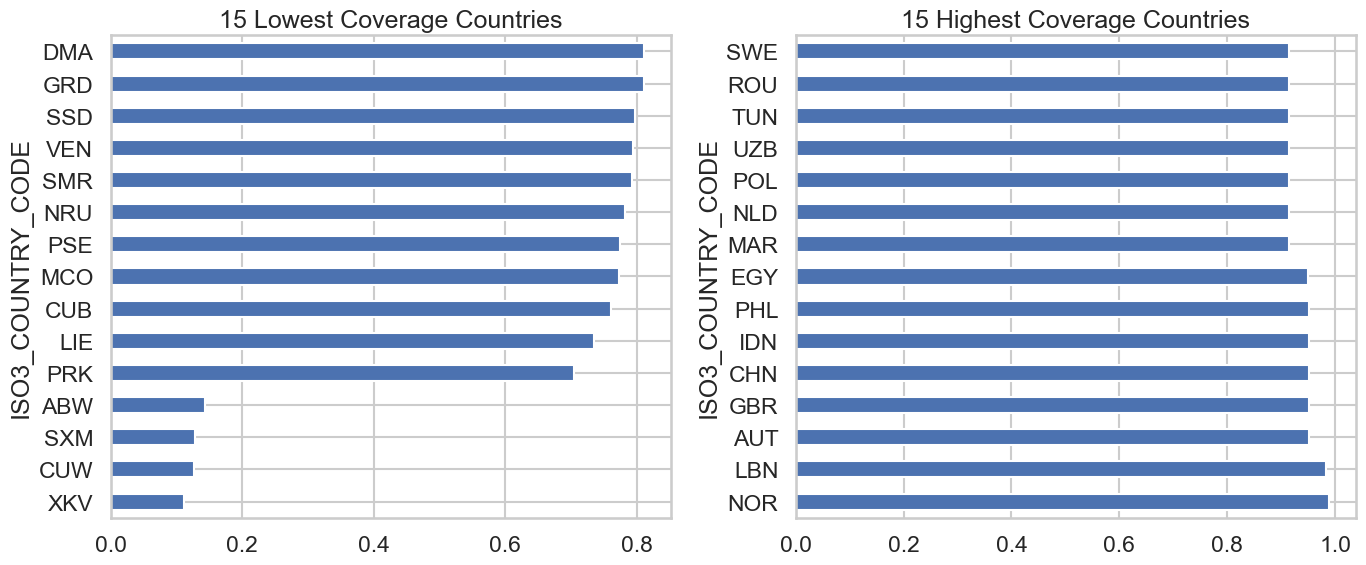

In [145]:
N = 15

worst = coverage.nsmallest(N)
best = coverage.nlargest(N)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

worst.plot(kind="barh", ax=axes[0])
axes[0].set_title(f"{N} Lowest Coverage Countries")

best.plot(kind="barh", ax=axes[1])
axes[1].set_title(f"{N} Highest Coverage Countries")

plt.tight_layout()
plt.show()

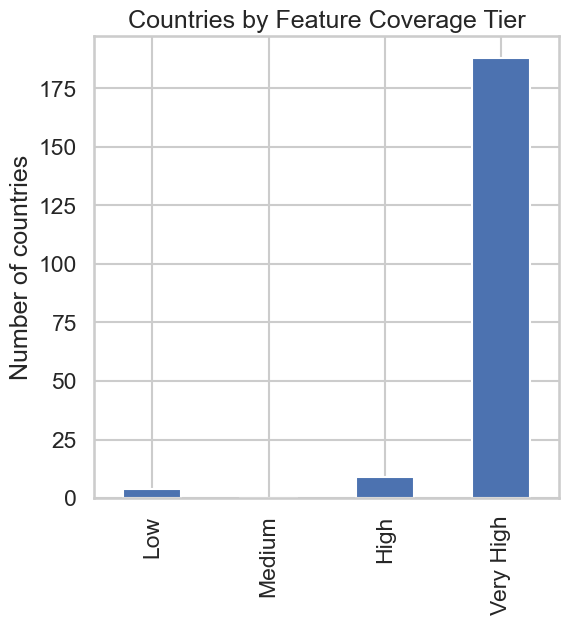

In [146]:
coverage_bins = pd.cut(
    coverage,
    bins=[0, 0.4, 0.6, 0.8, 1.0],
    labels=["Low", "Medium", "High", "Very High"]
)

coverage_summary = coverage_bins.value_counts().sort_index()

plt.figure(figsize=(6, 6))
coverage_summary.plot(kind="bar")
plt.ylabel("Number of countries")
plt.title("Countries by Feature Coverage Tier")
plt.show()